<h1>Sales Exploratory Data Analysis <h1>

<h2>1) Importing the required modules <h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>2) Loading the Dataset<h2>

In [2]:
data = pd.read_csv("sales_data_sample.csv", sep=",", encoding='Latin-1')
pd.set_option('display.max_columns', None)
data.head(4)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium


<h2>3) Exploring the dataframe<h2>

In [3]:
data.shape

(2823, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


<h1>4) Cleaning the Data <h1>

<h3>a) Handling missing values<h23>

In [5]:
if data.isnull().sum().sum() > 0:
    print(f'There are/is {data.isnull().sum().sum()} missing values in this dataset')
else:
    print('There are no missing values in this dataset')

There are/is 5157 missing values in this dataset


In [6]:
# addressline2 are filled with none
data.ADDRESSLINE2 = data.ADDRESSLINE2.replace(np.nan, 'None')

# nan values for State are filled with  'Not given' 
data.STATE = data.STATE.replace(np.nan, 'Not given')

# nan values for postalcode are filled with leading zero's
data.POSTALCODE = data.POSTALCODE.replace(np.nan, 00000)

# nan values for territory are filled with 'Not given'
data.TERRITORY = data.TERRITORY.replace(np.nan, 'Not given')

In [7]:
if data.isnull().sum().sum() > 0:
    print(f'There are/is {data.isnull().sum().sum()} missing values in this dataset')
else:
    print('There are no missing values in this dataset')

There are no missing values in this dataset


<h3>b) Converting the wrong data types<h3>

In [8]:
# ORDERDATE column was converted to a timestamp
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

<h3>c) Dropping Unecessary columns<h3>

In [9]:
# column MONTH_ID & YEAR_ID can be found in ORDERDATE
date = data.drop(['MONTH_ID', 'YEAR_ID'], axis=1)

In [10]:
data.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

<h2>Data Analysis<h2>

<h2>What the top 5 countries with the highest sales and lowest<h2>

In [11]:
# grouping the dataset by country against sales
Top_country = data.groupby('COUNTRY')['SALES'].sum()

# Converting the series into dataframe and sort the sales per country
Top_country = Top_country.to_frame().sort_values('SALES', ascending=False)

Top_country = Top_country.reset_index()

Top_5 = Top_country.head()
Top_5

,COUNTRY,SALES
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46


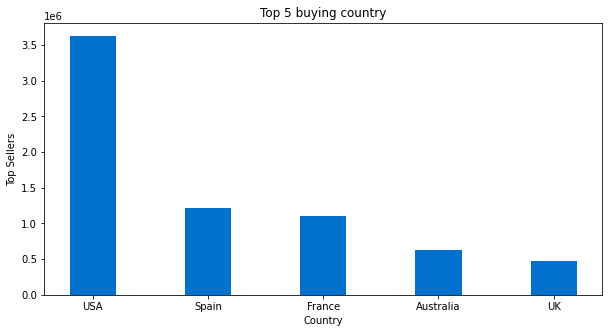

In [12]:
# Creating a bar graph
Top = Top_5['COUNTRY']
Top_sellers = Top_5['SALES']

fig = plt.figure(figsize = (10,5)) 
plt.bar(Top, Top_sellers, color = '#0072ce', width = 0.4)
plt.xlabel("Country")
plt.ylabel("Top Sellers")
plt.title("Top 5 buying country")
plt.show()

<h3> USA, Spain, France, Australia, and UK, are the top most ordering countries<h3>

In [17]:
least_5.head()

,COUNTRY,SALES
14,Japan,188167.81
15,Switzerland,117713.56
16,Belgium,108412.62
17,Philippines,94015.73
18,Ireland,57756.43


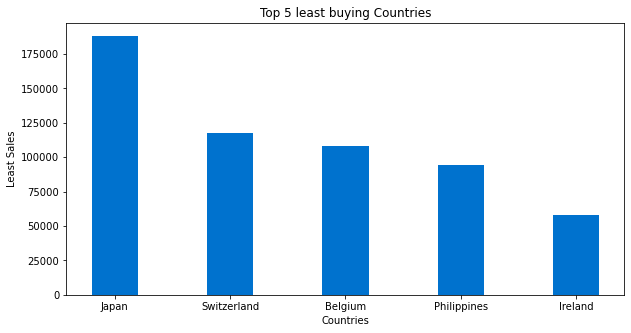

In [18]:
least = least_5['COUNTRY']
least_sales = least_5['SALES']

fig = plt.figure(figsize = (10,5)) 
plt.bar(least, least_sales, color = '#0072ce', width = 0.4)
plt.xlabel("Countries")
plt.ylabel("Least Sales")
plt.title("Top 5 least buying Countries")
plt.show()

<h3>Top less odering countries are Japan, Switzerland, Belgium, Phillipines and Island<h3>